Importing the libraries and dataset.

In [93]:
import numpy as np
import pandas as pd

In [94]:
df=pd.read_csv('placement.csv')

In [95]:
print(df.head(10))
print()
print(df.shape)

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0
5           5   7.1   48.0          1
6           6   5.7  143.0          0
7           7   5.0   63.0          0
8           8   6.1  156.0          0
9           9   5.1   66.0          0

(100, 4)


Steps to be followed:

1. preprocessing
2. eda
3. feature selection
4. extract input and output columns
5. split data into training and testing
6. train the model
7. evaluate the model
8. deploy the model

1. Preprocessing

In [97]:
print(df.isnull().sum())
print()
print(df.info())
#no missing values

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None


In [98]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
#df=df.iloc[:,1:] -> iloc used to select rows and columns by position and drop them -> check documentation

In [99]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


2.&3. EDA and Feature Selection

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

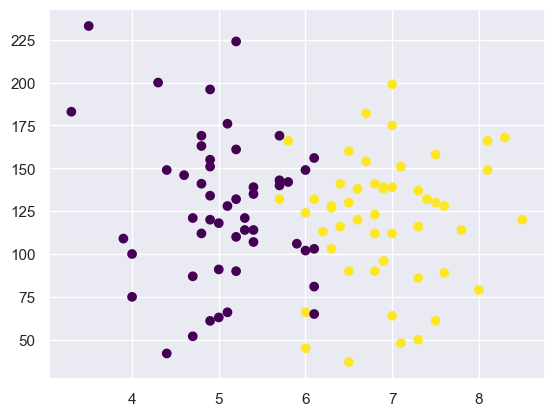

In [101]:
plt.scatter(df['cgpa'],df['iq'],c=df["placement"],cmap='viridis')   

4. Extract Output and Input Columns

In [103]:
x=df.iloc[:,0:2]
y=df.iloc[:,2:3]
print(x)
print()
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

    placement
0           1
1           0
2           0
3           1
4           0
..        ...
95          0
96          0
97          1
98          1
99          1

[100 rows x 1 columns]


5. Train,Test & Split

In [104]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)

In [105]:
X_train

,cgpa,iq
76,4.9,155.0
91,7.5,158.0
93,6.8,112.0
8,6.1,156.0
12,5.4,139.0
...,...,...
27,6.0,124.0
46,5.3,114.0
94,4.7,52.0
53,8.3,168.0


In [106]:
Y_train

,placement
76,0
91,1
93,1
8,0
12,0
...,...
27,1
46,0
94,0
53,1


In [107]:
print(X_test)
print(Y_test)

    cgpa     iq
15   5.1  176.0
0    6.8  123.0
57   6.5  130.0
52   7.0  175.0
73   4.9   61.0
44   7.5   61.0
21   7.1  151.0
18   4.0  100.0
7    5.0   63.0
58   8.0   79.0
    placement
15          0
0           1
57          1
52          1
73          0
44          1
21          1
18          0
7           0
58          1


In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [109]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.95378701,  0.7704376 ],
       [ 1.36623545,  0.84716875],
       [ 0.74161402, -0.32937557],
       [ 0.11699259,  0.79601465],
       [-0.50762885,  0.36120479],
       [-0.86455538, -0.17591327],
       [-1.04301864,  0.41235889],
       [ 0.11699259, -1.12226413],
       [ 0.29545585,  0.07985724],
       [-0.68609211,  0.9238999 ],
       [-0.77532374, -1.50591989],
       [-1.13225028, -0.09918212],
       [ 1.18777218,  0.31005069],
       [ 1.18777218, -1.9151527 ],
       [ 0.65238238,  1.46101796],
       [-1.22148191,  0.54024414],
       [ 0.92007728, -0.32937557],
       [ 0.92007728, -1.55707399],
       [ 0.38468748, -0.22706737],
       [-0.50762885,  0.25889659],
       [ 0.29545585,  0.05428018],
       [ 0.56315075, -0.12475917],
       [-0.06147068, -0.48283787],
       [-0.59686048, -0.09918212],
       [-1.48917681,  1.92140486],
       [ 1.27700381,  0.18216544],
       [-0.23993395,  0.46351299],
       [ 0.83084565, -0.73860838],
       [-2.20302987,

In [110]:
X_test=scaler.fit_transform(X_test)
X_test


array([[-0.86147841,  1.47573289],
       [ 0.48211177,  0.25554813],
       [ 0.24500762,  0.41670461],
       [ 0.6401812 ,  1.45271053],
       [-1.01954784, -1.17183782],
       [ 1.03535478, -1.17183782],
       [ 0.71921592,  0.90017404],
       [-1.73086028, -0.27396601],
       [-0.94051312, -1.12579311],
       [ 1.43052836, -0.75743544]])

6. Train the Model

In [111]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
#model training
clf.fit(X_train,Y_train)

c:\Users\ritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [112]:
#evaluate the model
Y_pred=clf.predict(X_test)
Y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [113]:
Y_test

,placement
15,0
0,1
57,1
52,1
73,0
44,1
21,1
18,0
7,0
58,1


7. Evaluate the Model

In [114]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred)*100,"%")

100.0 %


<Axes: >

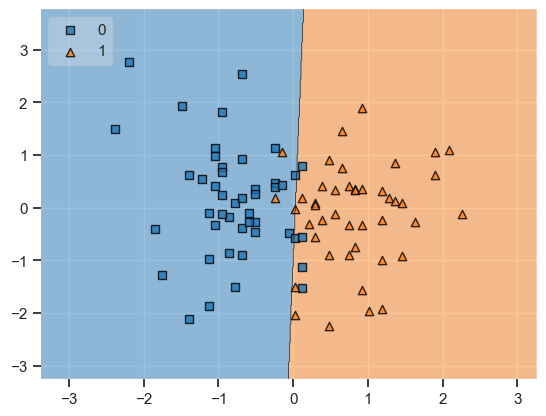

In [115]:
#plotting the decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train.values.ravel(),clf=clf,legend=2)

8. Deploy

In [116]:
import pickle

In [117]:
pickle.dump(clf,open('model.pkl','wb'))